# __Para tener en cuenta:__

* Se debe entregar un único notebook con la solución.
* Se seleccionará a un integrante del grupo para realizar la sustentación.
* Se asignará un valor de 50% a la calidad de los resultados obtenidos y 50% a la calidad de la sustentación.



# **1. Predicción del Desempeño Estudiantil (Regresión)**

El objetivo de este punto es aplicar algoritmos de regresión sobre los datos disponibles en: [Student Performance Dataset](https://archive.ics.uci.edu/dataset/320/student+performance). Su propósito es construir un modelo que permita predecir el promedio de las calificaciones de los estudiantes en los periodos G1, G2 y G3, basándose en las características proporcionadas en el dataset.

## **Tenga en cuenta:**

- Realice un análisis descriptivo de los datos disponibles.
- Realice un análisis exploratorio. Para esto formule al menos 7 preguntas que pueda considerar de interés de acuerdo con la naturaleza de los datos. Dentro de las preguntas formuladas se debe encontrar la comparación entre variables de tipo: numérica-numérica, numérica-categórica y categórica-categórica.
- Aplique técnicas de preprocesamiento de datos si es necesario. No olvide generar todo el proceso dentro de un `pipeline`
- Pruebe al menos dos algoritmos de regresión  (por ejemplo, **Regresión Lineal** y **Random Forest Regressor**) para predecir el promedio mencionado.
- Consulte en qué consiste el proceso de selección de características (**feature selection**) y aplíquelo para determinar cuáles son las más relevantes en la predicción.
- Consulte en qué consisten los **SHAP values (SHapley Additive exPlanations)** y cómo pueden ser utilizados para interpretar el impacto de cada característica en las predicciones del modelo.
- Use los **SHAP values** para analizar y explicar las contribuciones de las características más importantes en el modelo de mejor desempeño.
- Evalúe el rendimiento de los modelos utilizando  **RMSE (Root Mean Square Error)**, **MAE (Mean Absolute Error)** y **R² (Coeficiente de Determinación)**.
- Compare los resultados obtenidos entre los modelos y determine cuál es más efectivo para predecir el promedio.
- A partir de los resultados obtenidos, elabore recomendaciones dirigidas a instituciones educativas para mejorar el rendimiento académico de los estudiantes en función de las variables más influyentes.


#Solución

**Análisis descriptivo de los datos disponibles:**

In [ ]:
import pandas as pd
import zipfile
import os

In [ ]:
# Descomprimir el archivo
with zipfile.ZipFile("/content/student+performance.zip", 'r') as zip_ref:
    zip_ref.extractall("./student_performance")


In [ ]:
# Descomprimir el segundo archivo: student.zip
with zipfile.ZipFile("./student_performance/student.zip", 'r') as zip_ref:
    zip_ref.extractall("./student_performance/unzipped_student")

In [ ]:
# Listar los archivos en la carpeta final
files = os.listdir("./student_performance/unzipped_student")
print("Archivos disponibles tras descomprimir student.zip:", files)

Archivos disponibles tras descomprimir student.zip: ['student.txt', 'student-merge.R', 'student-por.csv', 'student-mat.csv']


In [ ]:
# Cargar el archivo student-mat.csv
data_file = "./student_performance/unzipped_student/student-mat.csv"
df = pd.read_csv(data_file, sep=';')  # Usamos ';' como separador

In [ ]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [ ]:
# Información general del dataset
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null

In [ ]:
# Estadísticas descriptivas básicas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   

In [ ]:
# Mostrar valores únicos de las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nValores únicos por cada columna categórica:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


Valores únicos por cada columna categórica:
school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


El dataset contiene información detallada sobre 395 estudiantes, con 33 columnas que incluyen variables categóricas y numéricas. Entre las variables categóricas, se encuentran características como el colegio del estudiante (school), género (sex), tamaño de la familia (famsize), ocupación de los padres (Mjob y Fjob), y acceso a recursos educativos como internet (internet) o apoyo escolar (schoolsup). Las variables numéricas incluyen edad (age), tiempo de estudio (studytime), número de fallos previos (failures), calificaciones de los periodos G1, G2 y G3, y ausencias escolares (absences). Los datos muestran una variabilidad interesante, por ejemplo, las calificaciones oscilan entre 0 y 20, mientras que las ausencias van desde 0 hasta un máximo de 75 días. Este análisis inicial sugiere que los datos son adecuados para explorar relaciones entre características, como el impacto de factores académicos y socioeconómicos en el rendimiento escolar.

**Realice un análisis exploratorio. Para esto formule al menos 7 preguntas que pueda considerar de interés de acuerdo con la naturaleza de los datos. Dentro de las preguntas formuladas se debe encontrar la comparación entre variables de tipo: numérica-numérica, numérica-categórica y categórica-categórica.**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
# 1. Manejo de valores faltantes (Imputación de valores faltantes)
# Para las variables numéricas, vamos a imputar con la media, y para las categóricas, con la moda
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
# Pipeline para variables numéricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar con la media
    ('scaler', StandardScaler())  # Escalado de los datos numéricos
])

In [ ]:
# Pipeline para variables categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificación One-Hot
])

In [ ]:
# Combinamos ambos preprocesamientos en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
# Aplicamos el preprocesamiento a los datos
df_preprocessed = preprocessor.fit_transform(df)

# Convertimos el resultado a un DataFrame
df_preprocessed = pd.DataFrame(df_preprocessed)

# Visualizamos los datos preprocesados
df_preprocessed.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
# Crear un pipeline final que aplique el preprocesamiento
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Muestra el pipeline
print(pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                

**1) ¿Existe una correlación entre las calificaciones de los periodos G1, G2 y G3? (Relación númerica - númerica)**

Esto permitirá identificar si el rendimiento en periodos anteriores influye en el desempeño final.


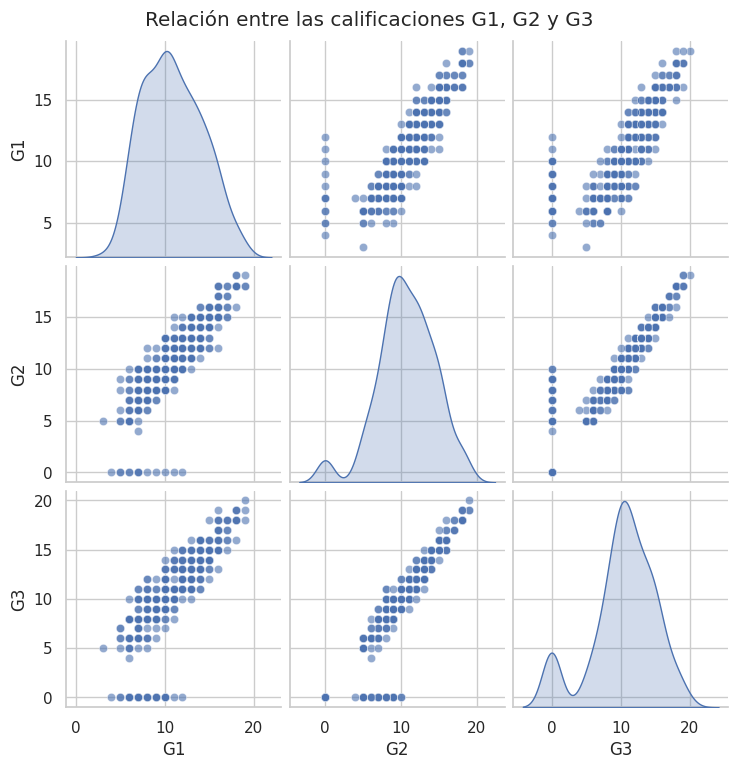

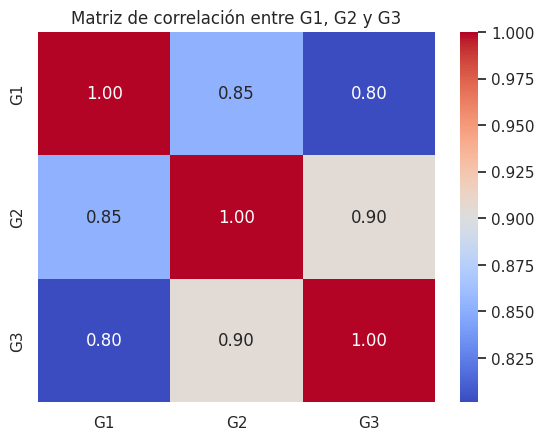

In [ ]:
# Filtrar las columnas de interés
grades = df[['G1', 'G2', 'G3']]

# Crear un pairplot para visualizar las relaciones entre las calificaciones
sns.set(style="whitegrid")
pairplot = sns.pairplot(grades, diag_kind="kde", plot_kws={"alpha": 0.6})
plt.suptitle("Relación entre las calificaciones G1, G2 y G3", y=1.02)
plt.show()

# Ver la correlación entre G1, G2 y G3
correlation = df[['G1', 'G2', 'G3']].corr()

# Mostrar la matriz de correlación
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre G1, G2 y G3')
plt.show()

 **Análisis**

 En el pairplot, las gráficas de dispersión entre G1, G2, y G3 muestran una relación lineal positiva. Esto indica que los estudiantes que obtienen buenas calificaciones en el primer periodo (G1) tienden a mantener un buen desempeño en el segundo (G2) y en las calificaciones finales (G3).
Los histogramas univariados para cada variable muestran distribuciones similares, con concentraciones alrededor de calificaciones intermedias, como 10-15, aunque hay algunos valores extremos en el rango bajo.

 La matriz de correlación cuantifica la relación entre las calificaciones:
* G1 y G2 tienen una correlación fuerte de 0.85, indicando que las calificaciones del primer y segundo periodo están estrechamente relacionadas.
* G2 y G3 tienen la mayor correlación de 0.90, lo que sugiere que el desempeño en el segundo periodo es un predictor confiable de la nota final.
* G1 y G3 tienen una correlación de 0.80, lo que implica que las calificaciones iniciales también influyen en el resultado final, aunque en menor medida que G2.

**2) ¿Cómo se relaciona el número de ausencias (absences) con las calificaciones finales (G3)? (Relación númerica - númerica)**
Se puede analizar si los estudiantes con mayor número de ausencias tienden a tener un peor desempeño académico.

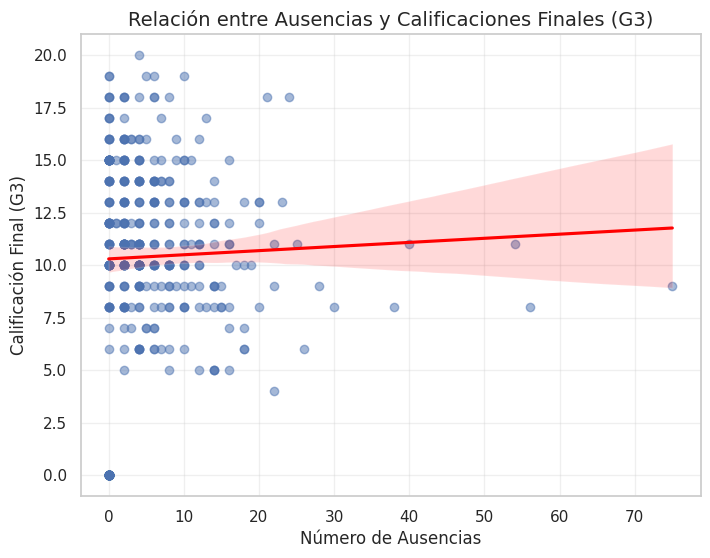

In [ ]:
# Crear el scatter plot con línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(x='absences', y='G3', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Configuración del gráfico
plt.title('Relación entre Ausencias y Calificaciones Finales (G3)', fontsize=14)
plt.xlabel('Número de Ausencias', fontsize=12)
plt.ylabel('Calificación Final (G3)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


**Análisis**

El análisis de la relación entre el número de ausencias y las calificaciones finales (G3) revela que, aunque existe una tendencia general a que los estudiantes con más ausencias obtengan calificaciones más bajas, esta relación es débil. Esto sugiere que la asistencia a clase es un factor relevante para el rendimiento académico, pero no es determinante por sí sola.

La alta dispersión de los datos indica que hay estudiantes que, a pesar de tener muchas ausencias, logran obtener calificaciones altas, así como otros que, con pocas ausencias, no tienen un buen desempeño. Esto enfatiza que el rendimiento académico está influenciado por una combinación de factores, como el compromiso personal, el entorno de aprendizaje, el apoyo familiar, y posiblemente incluso las metodologías de enseñanza y evaluación.

Aunque fomentar la asistencia a clases es importante y puede ser una estrategia efectiva para mejorar el desempeño académico, sería beneficioso también abordar otros factores que inciden en el aprendizaje, asegurando un enfoque más integral para apoyar a los estudiantes

**3) ¿Cuál es el promedio de calificaciones (G3) según el nivel educativo de la madre (Medu) y del padre (Fedu)? (relación númerica - categorica)**


Esto ayudará a explorar si el nivel educativo de los padres tiene un impacto significativo en el rendimiento académico.

<ipython-input-329-8f6706bb77f8>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


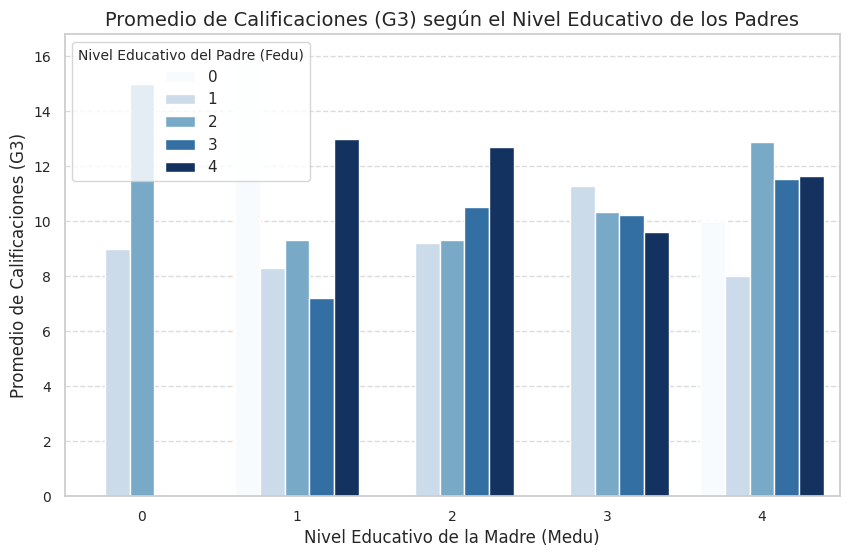

In [ ]:
# Agrupar los datos y calcular el promedio de G3 según Medu y Fedu
avg_grades = df.groupby(['Medu', 'Fedu'])['G3'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_grades,
    x='Medu',
    y='G3',
    hue='Fedu',
    palette='Blues',
    ci=None
)

# Configuración del gráfico
plt.title('Promedio de Calificaciones (G3) según el Nivel Educativo de los Padres', fontsize=14)
plt.xlabel('Nivel Educativo de la Madre (Medu)', fontsize=12)
plt.ylabel('Promedio de Calificaciones (G3)', fontsize=12)
plt.legend(title='Nivel Educativo del Padre (Fedu)', title_fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Análisis**

El análisis muestra que existe una relación positiva entre el nivel educativo de los padres y el rendimiento académico de sus hijos, con una tendencia ascendente en las calificaciones a medida que aumenta el nivel educativo de los padres. Tanto el nivel educativo de la madre como del padre influencian de manera acumulativa el desempeño de los estudiantes, siendo más evidentes las mejores calificaciones cuando ambos padres tienen un nivel educativo alto. Este fenómeno puede explicarse por el acceso a más recursos educativos, mayores expectativas académicas, un entorno de apoyo más sólido y, posiblemente, un componente genético que favorezca el rendimiento. En resumen, el nivel educativo de los padres es un factor determinante en el éxito académico de los estudiantes.

**4)¿Cómo varía el promedio de calificaciones (G3) según el tiempo dedicado al estudio semanal (studytime)? (relación númerica - categorica)**


Permitirá evaluar si existe una relación directa entre el tiempo de estudio y el desempeño académico.

<ipython-input-330-2ec222f8e043>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='studytime', y='G3', data=df, ci=None, palette='Blues')
<ipython-input-330-2ec222f8e043>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='studytime', y='G3', data=df, ci=None, palette='Blues')


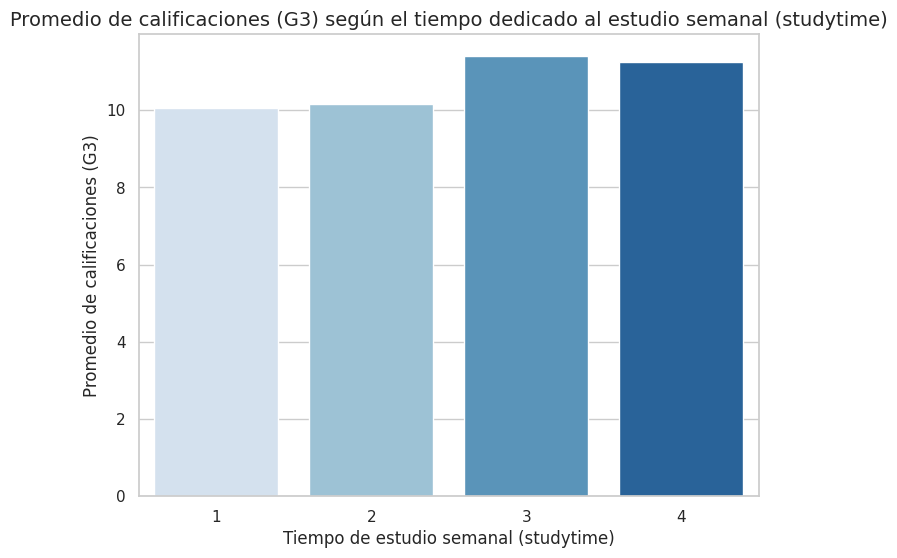

In [ ]:
# Asegurarse de que 'studytime' y 'G3' están presentes en el dataframe
plt.figure(figsize=(8, 6))

# Crear un gráfico de barras para comparar el promedio de G3 por categorías de studytime
sns.barplot(x='studytime', y='G3', data=df, ci=None, palette='Blues')

# Configuración de etiquetas y título
plt.title('Promedio de calificaciones (G3) según el tiempo dedicado al estudio semanal (studytime)', fontsize=14)
plt.xlabel('Tiempo de estudio semanal (studytime)', fontsize=12)
plt.ylabel('Promedio de calificaciones (G3)', fontsize=12)

# Mostrar el gráfico
plt.show()

**Análisis**

El gráfico muestra una relación positiva clara entre el tiempo dedicado al estudio semanal y el promedio de calificaciones (G3). Esto significa que, a medida que aumenta el tiempo dedicado al estudio, también tiende a aumentar el promedio de calificaciones.

**5)¿Influye el tipo de apoyo escolar (schoolsup) en las calificaciones finales (G3)? (Relación númerica - categorica)**


Este análisis puede revelar si recibir apoyo adicional tiene un impacto positivo.

<ipython-input-331-bc50def302d9>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='schoolsup', y='G3', data=df, ci=None, palette='viridis')
<ipython-input-331-bc50def302d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='schoolsup', y='G3', data=df, ci=None, palette='viridis')


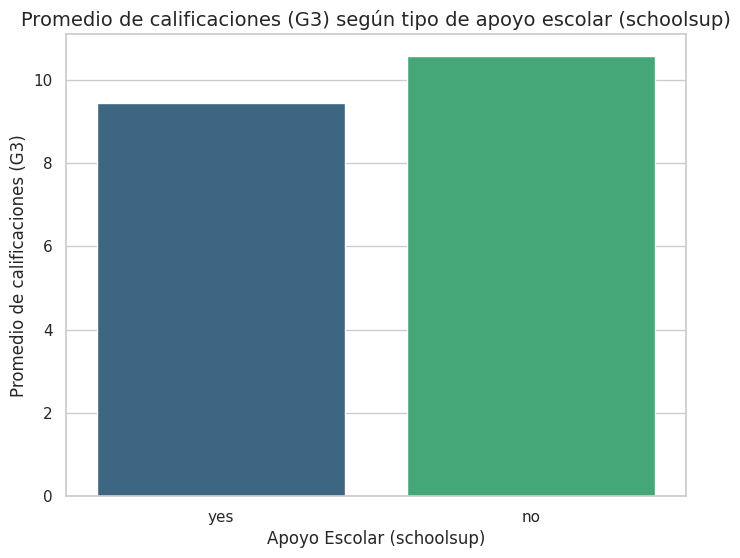

In [ ]:
# Asegurarse de que 'schoolsup' y 'G3' están presentes en el dataframe
plt.figure(figsize=(8, 6))

# Crear un gráfico de barras para comparar el promedio de G3 según el tipo de apoyo escolar
sns.barplot(x='schoolsup', y='G3', data=df, ci=None, palette='viridis')

# Configuración de etiquetas y título
plt.title('Promedio de calificaciones (G3) según tipo de apoyo escolar (schoolsup)', fontsize=14)
plt.xlabel('Apoyo Escolar (schoolsup)', fontsize=12)
plt.ylabel('Promedio de calificaciones (G3)', fontsize=12)

# Mostrar el gráfico
plt.show()

El gráfico muestra una relación inesperada, donde los estudiantes que no reciben apoyo escolar tienen un promedio de calificaciones (G3) más alto que aquellos que sí lo reciben. Esto podría deberse a que los estudiantes que buscan apoyo escolar enfrentan dificultades académicas preexistentes, lo que podría influir en su desempeño general. Además, si la participación en el apoyo escolar es voluntaria, es posible que quienes lo buscan tengan una mayor motivación para mejorar, aunque también enfrenten mayores desafíos. Es crucial también considerar el tamaño de la muestra en cada grupo, ya que una diferencia pequeña o basada en una muestra reducida podría no ser estadísticamente significativa. Por lo tanto, se recomienda un análisis más profundo para comprender las causas subyacentes de esta tendencia

**6) ¿Qué relación existe entre el estado civil de los padres (Pstatus) y el tamaño de la familia (famsize)? (relación categorica - categorica)**

Esto puede dar información sobre cómo están distribuidas estas características en la muestra.

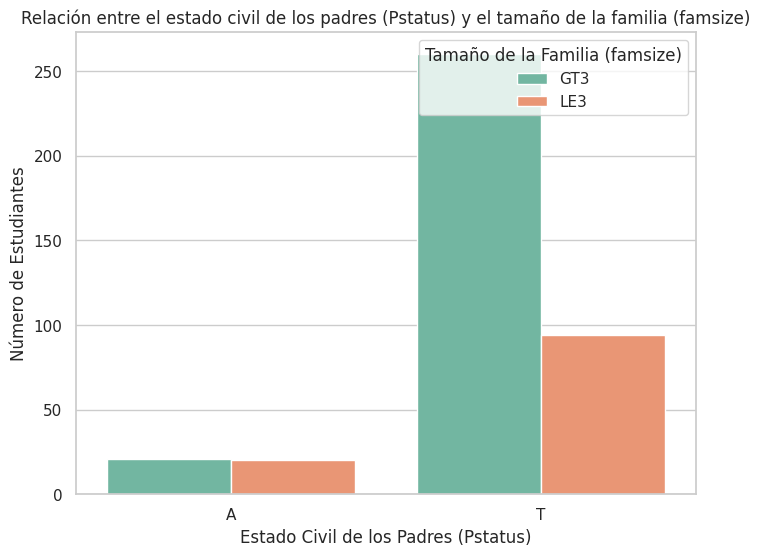

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pstatus', hue='famsize', data=df, palette='Set2')

# Configuración del gráfico
plt.title('Relación entre el estado civil de los padres (Pstatus) y el tamaño de la familia (famsize)')
plt.xlabel('Estado Civil de los Padres (Pstatus)')
plt.ylabel('Número de Estudiantes')
plt.legend(title='Tamaño de la Familia (famsize)', loc='upper right')

# Mostrar el gráfico
plt.show()

**Análisis**

El gráfico evidencia una clara relación entre el estado civil de los padres y el tamaño de la familia. Observamos que las familias donde los padres están "juntos" (categoría T) tienden a ser significativamente más grandes en comparación con aquellas donde los padres están "separados" (categoría A). Un aspecto interesante a destacar es que dentro del grupo de familias donde los padres están separados, no se aprecia una gran variación en el tamaño familiar.

**7) ¿Cómo se distribuyen los estudiantes según la combinación de género (sex) y el tipo de dirección residencial (address)?**


Esto ayudará a entender la relación entre género y ubicación, y su posible influencia en otros factores.

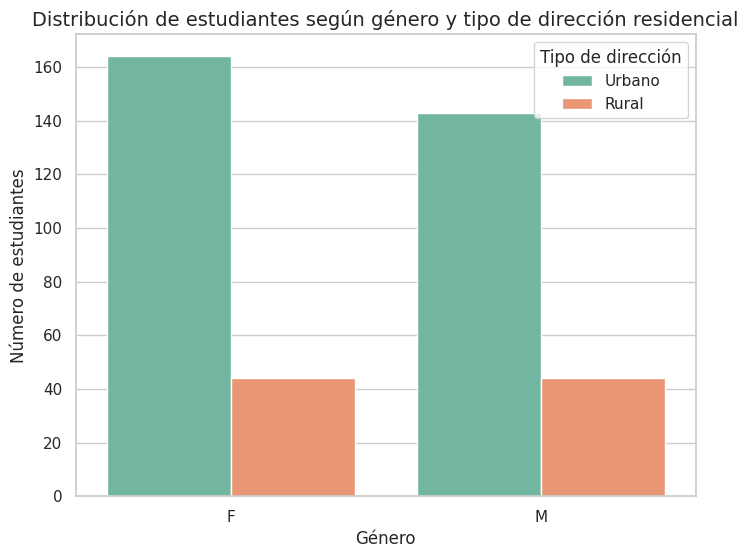

In [ ]:
# Crear gráfico de barras apiladas para visualizar la distribución
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='address', data=df, palette='Set2')

# Configuración del gráfico
plt.title('Distribución de estudiantes según género y tipo de dirección residencial', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de estudiantes', fontsize=12)
plt.legend(title='Tipo de dirección', loc='upper right', labels=['Urbano', 'Rural'])

# Mostrar gráfico
plt.show()

El gráfico muestra una clara tendencia hacia una mayor presencia de mujeres estudiantes, tanto en áreas urbanas como rurales. Sin embargo, se observa una concentración significativamente mayor de estudiantes, tanto hombres como mujeres, en zonas urbanas en comparación con zonas rurales. Esto sugiere que el acceso a la educación está más facilitado en áreas urbanas, posiblemente debido a una mayor oferta de instituciones educativas y oportunidades laborales. Aunque las mujeres parecen tener una mayor participación en la educación, es importante considerar que estos datos podrían estar influenciados por factores socioculturales y económicos que varían según el género y el lugar de residencia. Para obtener una comprensión más completa de estas diferencias, sería necesario realizar un análisis más profundo considerando variables como la edad, el nivel educativo, el tipo de institución y los factores socioeconómicos que influyen en la elección de la carrera y el lugar de residencia

* **Aplique técnicas de preprocesamiento de datos si es necesario. No olvide generar todo el proceso dentro de un `pipeline`**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


In [ ]:
print(df.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  # Elimina espacios en los nombres


In [ ]:
df.reset_index(inplace=True)

In [ ]:
columnas_numericas = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                      'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
                      'absences', 'G1', 'G2']  # Excluye 'G3'
columnas_categoricas = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
                        'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
                        'activities', 'nursery', 'higher', 'internet', 'romantic']


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Preprocesamiento para columnas numéricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Manejo de valores faltantes
    ('scaler', StandardScaler())  # Estandarización
])

# Preprocesamiento para columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Manejo de valores faltantes
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificación one-hot
])

# Combinación de preprocesadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, columnas_numericas),
        ('cat', categorical_transformer, columnas_categoricas)
    ]
)


In [ ]:
# Pipeline para regresión lineal
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Pipeline para Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


- Pruebe al menos dos algoritmos de regresión  (por ejemplo, **Regresión Lineal** y **Random Forest Regressor**) para predecir el promedio mencionado.

In [ ]:
# Variables predictoras y objetivo
X = df.drop('G3', axis=1)
y = df['G3']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar y evaluar Regresión Lineal
linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)

print("Regresión Lineal")
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R2:", r2_score(y_test, y_pred_linear))

# Entrenar y evaluar Random Forest
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("\nRandom Forest")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))


Regresión Lineal
MSE: 5.662423242496539
R2: 0.7238522219202568

Random Forest
MSE: 4.035386075949367
R2: 0.8032003524208421


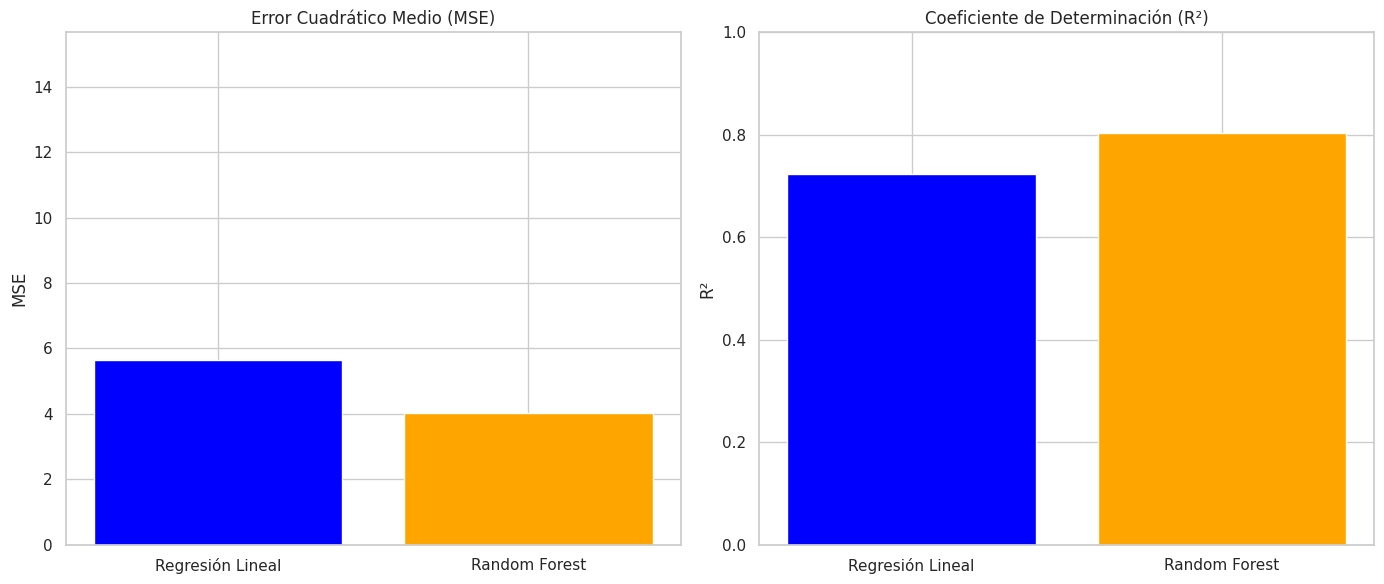

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados para cada modelo
models = ['Regresión Lineal', 'Random Forest']
mse_values = [mean_squared_error(y_test, y_pred_linear), mean_squared_error(y_test, y_pred_rf)]
r2_values = [r2_score(y_test, y_pred_linear), r2_score(y_test, y_pred_rf)]

# Crear una figura y ejes
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de MSE
ax[0].bar(models, mse_values, color=['blue', 'orange'])
ax[0].set_title('Error Cuadrático Medio (MSE)')
ax[0].set_ylabel('MSE')
ax[0].set_ylim(0, max(mse_values) + 10)

# Gráfico de R²
ax[1].bar(models, r2_values, color=['blue', 'orange'])
ax[1].set_title('Coeficiente de Determinación (R²)')
ax[1].set_ylabel('R²')
ax[1].set_ylim(0, 1)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


El modelo de Random Forest tiene un MSE más bajo (4.04 frente a 5.66 en Regresión Lineal), lo que indica que el modelo de Random Forest tiene un mejor ajuste a los datos y realiza predicciones más precisas en comparación con la Regresión Lineal.

 Por otro lado el modelo de Random Forest tiene un R² más alto (0.80 frente a 0.72 en la Regresión Lineal), lo que indica que Random Forest es más efectivo para explicar la varianza de los datos de predicción que la Regresión Lineal.

- Consulte en qué consiste el proceso de selección de características (**feature selection**) y aplíquelo para determinar cuáles son las más relevantes en la predicción.

El **feature selection** es una técnica de preprocesamiento de datos en la que se seleccionan las características (variables) más relevantes para la tarea de predicción. Este proceso ayuda a reducir la complejidad del modelo, mejora su rendimiento y evita el sobreajuste (overfitting), lo que puede llevar a un modelo más robusto y con menor tiempo de entrenamiento.

**¿Por qué realizar selección de características?**
- Mejora la precisión del modelo: Al eliminar características irrelevantes o redundantes, se puede mejorar la precisión y la generalización del modelo.
- Reduce el sobreajuste: Un modelo que usa muchas características puede sobreajustarse a los datos de entrenamiento, lo que afecta su rendimiento en los datos de prueba.
- Aumenta la eficiencia computacional: Reducir el número de características disminuye la complejidad computacional y el tiempo de entrenamiento.
- Mejora la interpretación del modelo: Al reducir las características, se facilita la interpretación del modelo, lo que permite comprender mejor cómo influye cada variable en la predicción.

**Métodos para la selección de características**
**Métodos de filtrado:**

Estos métodos evalúan cada característica de forma independiente utilizando una métrica de relevancia (por ejemplo, la correlación o el valor p).


Ejemplos:
Correlación: Se eliminan características altamente correlacionadas entre sí.
Prueba de chi-cuadrado: Para problemas de clasificación, evalúa la relación entre las características y la variable objetivo.
Análisis de varianza (ANOVA): Para características categóricas, selecciona las que tienen mayor capacidad para discriminar entre las clases.


**Métodos envolventes (wrapper methods):**

Estos métodos utilizan un modelo de predicción para evaluar el rendimiento de un subconjunto de características.


Ejemplos:
Selección recursiva de características (RFE, Recursive Feature Elimination): Este método elimina iterativamente las características menos importantes.
Método de selección secuencial hacia adelante: Comienza con un solo predictor y agrega uno a la vez, eligiendo siempre el que más mejora el rendimiento.
Método de selección secuencial hacia atrás: Empieza con todas las características y elimina iterativamente las menos importantes.


**Métodos basados en modelos (model-based methods):**

Utilizan la importancia de las características derivada de un modelo predictivo, como un árbol de decisión o Random Forest, para seleccionar las variables más relevantes.


Ejemplos:
Random Forest: Este algoritmo puede calcular la importancia de las características al medir cómo las características contribuyen a la reducción de la impureza en los árboles de decisión.
Lasso (Least Absolute Shrinkage and Selection Operator): Es una técnica de regularización que realiza selección de características al penalizar las variables menos relevantes.


Para la selección de características vamos a usar el Random Forest para determinar la importancia de las características en el conjunto de datos. Ya que este es uno de los métodos más comunes, Random Forest puede calcular la importancia de cada característica de manera efectiva.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Suponiendo que ya tienes el DataFrame df
# X = características y, y = objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el preprocesamiento para variables numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocesamiento numérico: imputación de valores faltantes y normalización
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocesamiento categórico: imputación de valores faltantes y codificación OneHot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Crear un preprocesador que aplique las transformaciones adecuadas a cada tipo de característica
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Crear el modelo RandomForest con el preprocesamiento aplicado
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Aplicar preprocesamiento
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Ajustar el modelo
rf_model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = rf_model.named_steps['regressor'].feature_importances_

# Visualizar las características más importantes
import matplotlib.pyplot as plt

# Crear un DataFrame con las características y su importancia
features = numeric_features.tolist() + list(rf_model.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features))
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Ordenar las características por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(importance_df)


              Feature  Importance
15                 G2    0.790576
13           absences    0.108217
0               index    0.026388
37        reason_home    0.014448
1                 age    0.005082
14                 G1    0.004979
7              famrel    0.004384
36      reason_course    0.003753
12             health    0.003135
9               goout    0.002986
5           studytime    0.002732
11               Walc    0.002273
8            freetime    0.001585
41    guardian_mother    0.001538
49      activities_no    0.001501
4          traveltime    0.001500
6            failures    0.001425
34      Fjob_services    0.001339
57        romantic_no    0.001290
3                Fedu    0.001258
33         Fjob_other    0.001174
30       Mjob_teacher    0.001169
50     activities_yes    0.001164
58       romantic_yes    0.001103
2                Medu    0.000864
28         Mjob_other    0.000791
25          Pstatus_T    0.000765
42     guardian_other    0.000736
10            

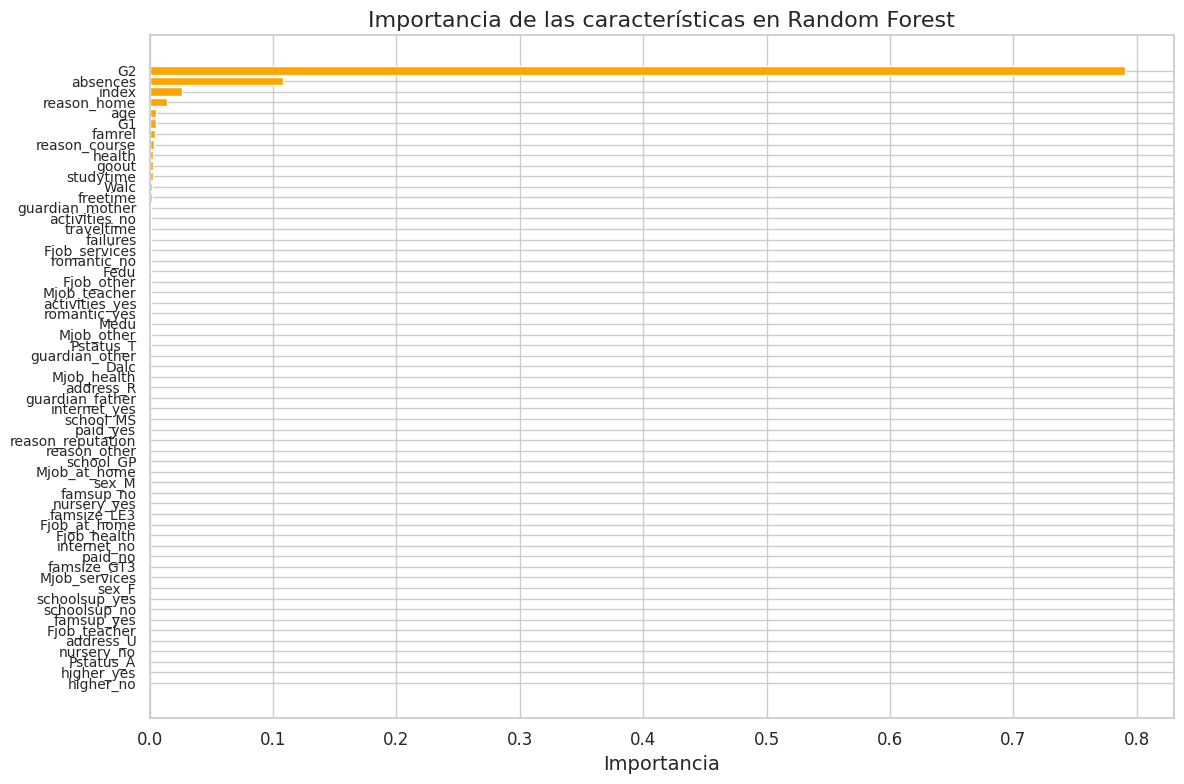

In [ ]:
import matplotlib.pyplot as plt
importance_df = importance_df.reset_index(drop=True)

# Crear la figura con un tamaño más grande para mejorar la visualización
plt.figure(figsize=(12, 8))

# Dibujar el gráfico de barras horizontales
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')

# Ajustar el título y las etiquetas de los ejes
plt.xlabel('Importancia', fontsize=14)
plt.title('Importancia de las características en Random Forest', fontsize=16)

# Rotar las etiquetas del eje y para que no se vean pegadas
plt.gca().invert_yaxis()  # Mostrar las más importantes en la parte superior
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

# Ajustar el espaciado de la figura para que no se solapen las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Aca en la grafica podemos ver la importancia de la variable G2 y las ausencias las otras tiene una importancia menor pero por eke,plo el Address_U que es una direccion tiene cero importancia para el modelo, adicional a esto las que son importantes serian las 12 primeras variables que influyen al modelo

- Consulte en qué consisten los **SHAP values (SHapley Additive exPlanations)** y cómo pueden ser utilizados para interpretar el impacto de cada característica en las predicciones del modelo.

SHAP (SHapley Additive exPlanations) es una técnica avanzada utilizada para interpretar los modelos de Machine Learning de manera explicativa y transparente. Los valores SHAP son una extensión de la teoría de juegos de Shapley, que fue originalmente propuesta por Lloyd Shapley en 1953. El objetivo de SHAP es atribuir una contribución cuantificable a cada característica en una predicción de un modelo, lo que permite entender el impacto de cada variable en las decisiones del modelo.

**Conceptos clave de SHAP:**
**Atribución de la contribución de las características:**


Los valores SHAP asignan a cada característica un valor que refleja su contribución al resultado final de una predicción. Este valor es la diferencia entre la predicción del modelo con la característica incluida y la predicción base del modelo (la predicción promedio sin usar ninguna característica).
Fundamento teórico de los valores SHAP:

Los valores SHAP se basan en valores Shapley de la teoría de juegos, que busca calcular la contribución de cada jugador en un juego cooperativo (en este caso, las características en el modelo) de manera justa. Se calcula el impacto de cada característica sobre todas las posibles combinaciones de características que podrían haber sido utilizadas en la predicción.
Explicabilidad local y global:

Local: Los valores SHAP permiten explicar cómo una característica influyó en una predicción específica para un dato particular.
Global: Los valores SHAP también pueden ser agregados para obtener una visión general del impacto de cada característica en el modelo en su conjunto.


**¿Cómo se utilizan los SHAP values?**


1. Interpretación individual:
Para una instancia individual (es decir, una predicción específica de un modelo), los valores SHAP muestran cómo cada característica contribuye a que el modelo prediga un valor particular en relación con la predicción base.
Por ejemplo, si un modelo predice que un estudiante pasará o no pasará el examen, el valor SHAP puede mostrar cómo características como "número de horas de estudio" o "número de ausencias" contribuyen a esa predicción.
2. Explicación global del modelo:
Si quieres entender la importancia de cada característica en todo el conjunto de datos, puedes agregar los valores SHAP a nivel global. Esto te permitirá ver cuáles son las características más relevantes para el modelo en general.
3. Visualización de los valores SHAP:
Gráficos de barras: Muestran la importancia media de las características a través de sus valores SHAP.
Gráficos de dispersión: Representan la relación entre los valores SHAP y los valores de las características, ayudando a identificar cómo el cambio en una característica afecta el resultado final.
Dependence plots: Muestran cómo el valor de una característica afecta el valor SHAP mientras se controla el valor de otras características.
Force plots: Ayudan a ver cómo las características empujan hacia una predicción específica.


**¿Cómo se calculan los valores SHAP?**


El cálculo de los valores SHAP implica la evaluación de todas las posibles combinaciones de características en un modelo, lo cual es costoso computacionalmente. En términos sencillos, para cada característica, se mide cuánto cambia la predicción cuando se incluye o excluye esa característica, y luego se calcula una media ponderada de todas las contribuciones posibles.

Existen diferentes implementaciones y optimizaciones para calcular los valores SHAP dependiendo del tipo de modelo:

Modelos de árbol (por ejemplo, Random Forest, XGBoost): Para modelos basados en árboles, SHAP utiliza algoritmos eficientes como TreeSHAP para calcular los valores de manera más rápida que el cálculo exacto para modelos no basados en árboles.

Modelos lineales o redes neuronales: Para modelos no basados en árboles, los valores SHAP se calculan utilizando la teoría de juegos y algunos métodos aproximados si el modelo es muy complejo.

- Use los **SHAP values** para analizar y explicar las contribuciones de las características más importantes en el modelo de mejor desempeño.

In [ ]:
# Verificar los tipos de columnas antes de pasar al pipeline
print(X_train.dtypes)

# Verificar las primeras filas de las columnas categóricas
print(X_train[categorical_cols].head())

# Asegurarnos de que las columnas categóricas están correctamente identificadas
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Imprimir las columnas categóricas identificadas
print("Columnas categóricas identificadas:", categorical_cols)

# Verificar si hay valores nulos en los datos de entrenamiento
print(X_train.isnull().sum())

# Crear el preprocesador
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
categorical_cols = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                               ('scaler', StandardScaler())]), numerical_cols),
        ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
    ]
)

# Crear el modelo Random Forest
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar el modelo
rf_model.fit(X_train, y_train)


index          int64
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
dtype: object
    school sex address famsize Pstatus      Mjob      Fjob  reason guardian  \
181     GP   M       U     GT3       T  services     other    home   mother   
194     GP   M       U     GT3       T     other     other    home   father   
173     GP   F       U     GT3       T   at_home  servic

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health', 'absences',
                                                   'G1', 'G2']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
# Convertir las columnas categóricas a tipo 'category' si es necesario
X_train[categorical_cols] = X_train[categorical_cols].apply(lambda x: x.astype('category'))

# O utilizar LabelEncoder (en lugar de OneHotEncoder)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[categorical_cols] = X_train[categorical_cols].apply(le.fit_transform)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import shap

# Entrenar el modelo Random Forest (asegúrate de tener el mejor modelo entrenado)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)




RandomForestRegressor(random_state=42)

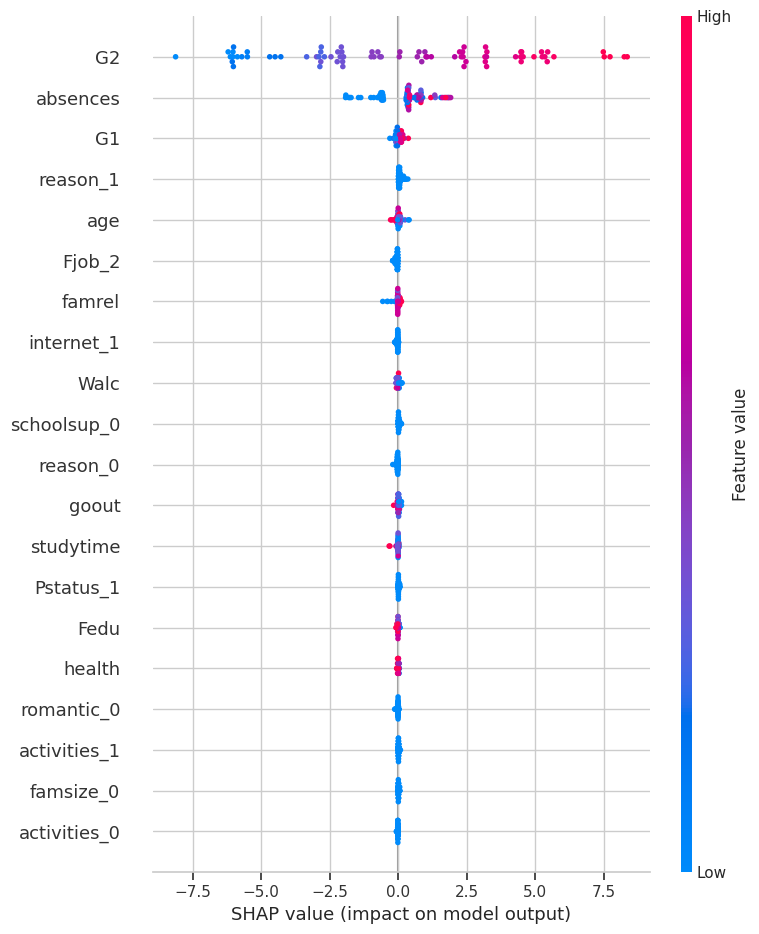

In [ ]:
import shap
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Suponiendo que ya tienes X_train, X_test, y_train preprocesados correctamente

# Definir las columnas numéricas y categóricas
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                               ('scaler', StandardScaler())]), numerical_cols),
        ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
    ]
)

# Crear el modelo Random Forest dentro de un Pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Ahora, usar SHAP con el modelo entrenado
# Creamos el explainer basado en el modelo Random Forest (la parte del regressor)
explainer = shap.TreeExplainer(rf_model.named_steps['regressor'])

# Obtener los valores SHAP para el conjunto de prueba (transformar X_test)
X_test_transformed = rf_model.named_steps['preprocessor'].transform(X_test)

# Obtener los nombres de las características transformadas
# Primero, obtenemos las características numéricas
num_feature_names = numerical_cols
# Luego, obtenemos las características codificadas con OneHotEncoder
cat_feature_names = rf_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
# Combinamos las dos listas de nombres de características
all_feature_names = num_feature_names + list(cat_feature_names)

# Obtener los valores SHAP
shap_values = explainer.shap_values(X_test_transformed)

# Visualizar los valores SHAP
shap.summary_plot(shap_values, X_test_transformed, feature_names=all_feature_names)


In [ ]:
# Asegurémonos de transformar la instancia que estamos pasando al force_plot
shap.initjs()  # Para usar gráficos interactivos

# Transformar la primera instancia de X_test
X_test_instance_transformed = rf_model.named_steps['preprocessor'].transform(X_test.iloc[[0]])

# Ahora podemos usar el force plot
shap.force_plot(explainer.expected_value, shap_values[0], X_test_instance_transformed[0])


**Como interpretar estos graficos:**


  - **Características más importantes:** En el gráfico de resumen, observa las características que están más a la izquierda (con mayor impacto) o aquellas que tienen una gran dispersión en sus valores SHAP. Esto indica que son las más relevantes para las predicciones.
  - **Relación entre características y resultados:** En el gráfico de dependencia, puedes observar si hay una relación lineal, no lineal o una interacción entre las características y las predicciones. Por ejemplo, si "studytime" tiene una relación positiva con las predicciones, significa que a medida que aumenta el tiempo de estudio, también lo hace la predicción del promedio.
  - **Contribuciones individuales:** Con el gráfico de fuerza, puedes observar cómo una característica individual (como el número de ausencias) puede aumentar o disminuir el valor final de la predicción para un estudiante específico.

- Grafico 1:

1. Eje X (SHAP value):
- Este eje muestra el valor SHAP para cada característica, que representa el impacto de esa característica en la predicción del modelo. Los valores pueden ser positivos o negativos:
- Valores positivos: indican que la característica aumenta la predicción del modelo.
- Valores negativos: indican que la característica disminuye la predicción del modelo.
- La distribución de estos valores a lo largo del eje muestra el rango de impacto de cada característica en las predicciones.


2. Eje Y (Características):
- Cada fila en este eje representa una característica del conjunto de datos. En el gráfico, las características están dispuestas de acuerdo con su importancia relativa en el modelo, desde la más importante en la parte superior hasta la menos importante en la parte inferior.
- Por ejemplo, G2 (posiblemente la calificación final) es la característica más importante, mientras que activities_0 parece ser una de las menos relevantes.


3. Colores:
- Los puntos están coloreados según los valores de la característica, lo que se indica con la barra de color en la parte derecha.
- Colores rojos (alta): indican que los valores altos de la característica están asociados con mayores impactos en la predicción del modelo.
- Colores azules (baja): indican que los valores bajos de la característica están asociados con menores impactos en la predicción.

**Basado en lo anterior:**


- Las características como "G2" (calificación final) y "absences" (ausencias) tienen un gran impacto en la predicción del modelo. Esto es evidente porque tienen una mayor dispersión de valores SHAP, indicando que varían considerablemente dependiendo de los valores de estas características.

- G2 tiene un impacto positivo en la predicción del modelo, lo que sugiere que un mayor valor de "G2" aumenta la predicción del modelo (por ejemplo, la calificación final de los estudiantes podría estar asociada con un resultado favorable en la predicción).

- "absences" (ausencias) muestra una dispersión similar, pero con una tendencia a disminuir la predicción del modelo. Esto sugiere que las ausencias más altas están asociadas con un resultado negativo.

- Características como "studytime", "health", y "romantic_0" tienen una menor dispersión en sus valores SHAP, lo que implica que su contribución al modelo es relativamente constante.

- Grafico 2:

1. Valor base (base value): Es el valor promedio de la predicción sin tener en cuenta ninguna de las características. En este caso, es 10.34, que representa el valor de predicción promedio del modelo cuando no se ha considerado ninguna de las características específicas de la instancia.

2. Predicción final (f(x)): Este es el valor de la predicción del modelo para una instancia específica, que en este caso es 8.33. La predicción se ajusta gracias a las características que afectan esta predicción en particular.

3. Contribución de las características: Cada barra representa la contribución de una característica al valor de la predicción final. Las barras rojas indican que la característica reduce el valor de la predicción, mientras que las barras azules indican que la característica aumenta el valor de la predicción.

    En este caso, la característica "higher" (probablemente relacionada con el nivel educativo o algo similar) tiene una contribución negativa (roja) que reduce la predicción en 0.46.
    La barra azul muestra una contribución positiva que aumenta la predicción en 0.71. Esto sugiere que la característica asociada a esta barra está incrementando la predicción final.


  **Finalmente basado en lo anterior:**

  Valor Base: 10.34 es el valor promedio del modelo sin características específicas, la contribución de la característica "higher" (posiblemente relacionada con la educación o el nivel socioeconómico) tiene un impacto negativo, bajando la predicción de 10.34 a 8.33. Esto puede indicar que para esta muestra en particular, el nivel "higher" disminuye el rendimiento o el puntaje esperado. La contribución de la otra característica(G2) la barra azul indica una característica cuyo valor positivo aumenta la predicción, lo que significa que esta característica contribuye favorablemente a que la predicción sea más alta.

- Evalúe el rendimiento de los modelos utilizando  **RMSE (Root Mean Square Error)**, **MAE (Mean Absolute Error)** y **R² (Coeficiente de Determinación)**.




In [ ]:
# Supongamos que tienes estos valores (reemplaza estos con tus datos reales)
# Predicciones de los modelos
y_pred_rf = rf_model.predict(X_test)  # Predicciones del modelo Random Forest

# Calcular MAE, RMSE y R² para Regresión Lineal
mae_lr = mean_absolute_error(y_test, y_pred_linear)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_lr = r2_score(y_test, y_pred_linear)

# Calcular MAE, RMSE y R² para Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Crear listas para graficar y comparar
models = ['Regresión Lineal', 'Random Forest']  # Nombres de los modelos
mae_values = [mae_lr, mae_rf]  # Valores de MAE de cada modelo
rmse_values = [rmse_lr, rmse_rf]  # Valores de RMSE de cada modelo
r2_values = [r2_lr, r2_rf]  # Valores de R² de cada modelo

# Mostrar los resultados de las métricas
print(f"Regresión Lineal - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")


Regresión Lineal - MAE: 1.65, RMSE: 2.38, R²: 0.72
Random Forest - MAE: 1.07, RMSE: 1.67, R²: 0.86


- Compare los resultados obtenidos entre los modelos y determine cuál es más efectivo para predecir el promedio.

In [ ]:
# Definimos los dos modelos: Regresión Lineal y Random Forest
models = ['Regresión Lineal', 'Random Forest']

# Calcular las métricas para cada modelo
mae_values = [mae_lr, mae_rf]
rmse_values = [rmse_lr, rmse_rf]
r2_values = [r2_lr, r2_rf]

# Asegúrate de que tienes dos colores, uno para cada modelo
colors = ['blue', 'orange']

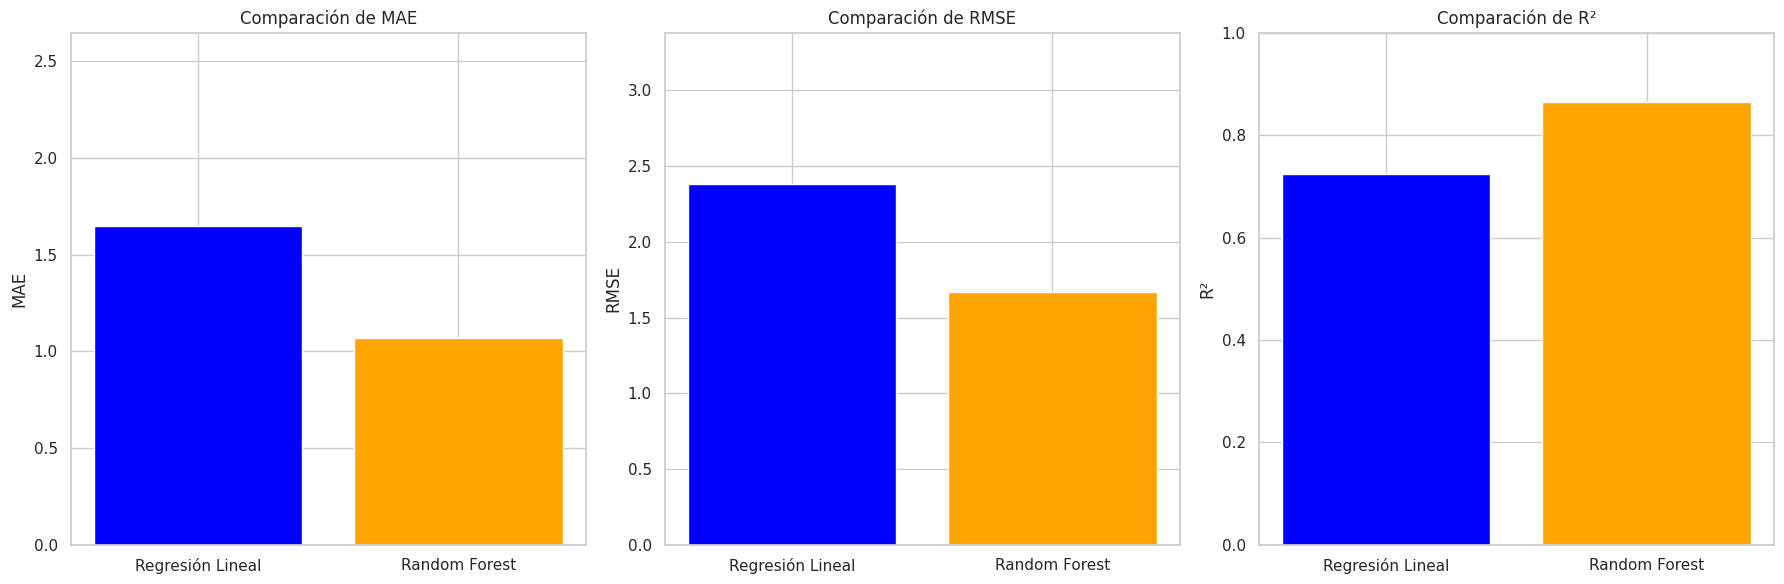

In [ ]:
# Crear un gráfico de barras para comparar los modelos
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico MAE
ax[0].bar(models, mae_values, color=colors)
ax[0].set_title('Comparación de MAE')
ax[0].set_ylabel('MAE')
ax[0].set_ylim([0, max(mae_values) + 1])

# Gráfico RMSE
ax[1].bar(models, rmse_values, color=colors)
ax[1].set_title('Comparación de RMSE')
ax[1].set_ylabel('RMSE')
ax[1].set_ylim([0, max(rmse_values) + 1])

# Gráfico R²
ax[2].bar(models, r2_values, color=colors)
ax[2].set_title('Comparación de R²')
ax[2].set_ylabel('R²')
ax[2].set_ylim([0, 1])

# Mostrar el gráfico
plt.tight_layout()
plt.show()


**- A partir de los resultados obtenidos, elabore recomendaciones dirigidas a instituciones educativas para mejorar el rendimiento académico de los estudiantes en función de las variables más influyentes.**

- Basándonos en el análisis de las características más influyentes en el rendimiento académico de los estudiantes, se sugieren las siguientes recomendaciones:

**1. Fomentar la mejora de las calificaciones previas (G2)**

**Acción recomendada:** Implementar programas de tutorías y reforzamiento académico para estudiantes con calificaciones bajas en evaluaciones previas.

**Impacto esperado:** Al mejorar las calificaciones intermedias (como G2), se puede aumentar significativamente el rendimiento académico general, dado su alto impacto positivo en las predicciones del modelo.

**Estrategias específicas:**
Seguimiento personalizado con profesores para identificar áreas de mejora.
Uso de plataformas digitales con lecciones interactivas y ejercicios adaptados al nivel de cada estudiante.
Realización de simulacros y pruebas formativas periódicas.

**2. Reducir el impacto de las ausencias (absences)**

**Acción recomendada:** Establecer políticas y programas para minimizar el ausentismo escolar.

**Impacto esperado:** Las ausencias tienen un efecto negativo en el rendimiento académico; al reducirlas, se espera mejorar los resultados finales de los estudiantes.

**Estrategias específicas:**
Detectar y abordar las causas principales del ausentismo (como problemas familiares, de salud o económicos).
Implementar incentivos para la asistencia regular, como premios simbólicos por asistencia perfecta.
Ofrecer flexibilidad en horarios o aprendizaje híbrido para estudiantes con dificultades personales.

**3. Promover hábitos de estudio saludables (studytime)**

**Acción recomendada:** Fomentar el establecimiento de rutinas de estudio estructuradas entre los estudiantes.

**Impacto esperado:** Aunque su contribución es constante, el tiempo de estudio influye positivamente en el rendimiento académico.

**Estrategias específicas:**
Enseñar técnicas de manejo del tiempo y organización personal.
Proveer espacios adecuados de estudio en la institución, como bibliotecas y salas de aprendizaje colaborativo.
Implementar campañas que conciencien a los estudiantes y sus familias sobre la importancia del tiempo de estudio.

**4. Atender la salud y el bienestar de los estudiantes (health)**

**Acción recomendada:** Mejorar el apoyo a la salud física y mental de los estudiantes.

**Impacto esperado:** Un mejor estado de salud contribuye indirectamente a la capacidad de los estudiantes para concentrarse y rendir académicamente.

**Estrategias específicas:**
Ofrecer servicios de consejería psicológica y programas de manejo del estrés.
Promover actividades físicas y hábitos de vida saludables.
Realizar evaluaciones médicas periódicas para detectar y tratar problemas de salud tempranamente.

**5. Revisar y reforzar programas educativos según niveles educativos (higher)**

**Acción recomendada:** Asegurar que los programas educativos estén alineados con las necesidades y capacidades de los estudiantes.

**Impacto esperado:** La relación negativa de esta variable en casos específicos sugiere que ciertos enfoques educativos pueden no ser efectivos para todos los estudiantes.

**Estrategias específicas:**
Ofrecer programas de nivelación académica para estudiantes que ingresan con desventajas educativas.
Adaptar los planes de estudio para ser más inclusivos y personalizados según el nivel de aprendizaje de los estudiantes.
Capacitar a los docentes en metodologías pedagógicas inclusivas y diferenciadas.

**6. Fomentar actividades extracurriculares orientadas al desarrollo integral**

**Acción recomendada:** Aunque algunas actividades extracurriculares (como "romantic_0") tienen menor impacto, es importante promover aquellas que fortalezcan habilidades sociales y emocionales.
**Impacto esperado:** Estas actividades pueden contribuir al bienestar general del estudiante, lo que a su vez puede reflejarse en un mejor rendimiento académico.
**Estrategias específicas:**
Ofrecer clubes de lectura, deportes, música y tecnología.
Crear espacios para el desarrollo de proyectos grupales que fomenten la creatividad y el trabajo en equipo.

**7. Implementar sistemas de monitoreo y análisis de datos**

**Acción recomendada:** Utilizar herramientas analíticas para identificar patrones de desempeño y características que impactan en el rendimiento académico.

**Impacto esperado:** Un análisis constante permitirá identificar problemas a tiempo y ajustar las estrategias educativas.

**Estrategias específicas:**
Implementar plataformas de seguimiento académico basadas en datos.
Capacitar al personal docente en el uso de estas herramientas para la toma de decisiones informadas.

# **2. Detección de Fraude en Tarjetas de Crédito (Clasificación)**

El objetivo de este punto es aplicar algoritmos de clasificación sobre los datos disponibles en: [Credit Card Fraud Detection Dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud). Su propósito es construir un modelo que permita identificar transacciones fraudulentas con la mayor precisión posible, teniendo en cuenta que las clases están altamente desbalanceadas.

## **Tenga en cuenta:**

- Consulte en qué consiste la idea detrás del proceso de **detección de fraudes** y su importancia en la industria financiera.
- Realice un análisis descriptivo de los datos disponibles, identificando patrones relevantes y características problemáticas.
- Consulte cuáles son los desafíos de trabajar con datos **desbalanceados** y explore estrategias para tratarlo, como el uso de técnicas de **undersampling**, **oversampling** (e.g., SMOTE) y **class weighting**.
- Aplique al menos dos algoritmos de clasificación (por ejemplo, **Random Forest** y **Logistic Regression**). Compare los resultados obtenidos.
- No olvide generar todos el proceso en un `pipeline`
- Consulte en qué consiste la técnica de **SMOTE** para el manejo de datos desbalanceados y aplíquela en el preprocesamiento del dataset.
- Aplique nuevamente los algoritmos de clasificación después del preprocesamiento con **SMOTE**. Compare los resultados obtenidos con los del dataset original.
- A partir de los resultados obtenidos, elabore recomendaciones dirigidas al área de seguridad financiera, enfocándose en la efectividad del modelo para identificar fraudes con un bajo nivel de falsos negativos.


In [ ]:
# solución propuesta

# **3. Segmentación de Mercado (Agrupamiento)**

El objetivo de este punto es aplicar algoritmos de aprendizaje no supervisado sobre los datos disponibles en: [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset). Su propósito es identificar *grupos* de clientes que presenten patrones de comportamiento similares, lo que permitirá al área de mercadeo tomar decisiones adaptadas a cada segmento.

## **Tenga en cuenta:**

- Consulte en qué consiste la idea detrás del proceso de **segmentación de mercado** y su importancia en estrategias comerciales.
- Realice un análisis descriptivo de los datos disponibles.
- Consulte en qué consiste el algoritmo de aprendizaje no supervisado **DBSCAN**. Mencione sus ventajas y desventajas en comparación con **k-means**.
- Aplique ambos algoritmos a los datos disponibles. Presente los resultados obtenidos y determine la mejor agrupación según las métricas de evaluación.
- Consulte en qué consiste la reducción de dimensionalidad mediante el algoritmo **PCA**.
- Aplique nuevamente ambos algoritmos de agrupamiento posterior a la aplicación de **PCA**. Compare los resultados obtenidos sin la aplicación de PCA.
- A partir de los resultados obtenidos, elabore recomendaciones dirigidas al área de mercadeo relacionadas con la segmentación de mercado.

In [ ]:
# Solución propuesta